In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
from tensorflow.keras import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.keras.layers import Dense,Dropout,Activation,MaxPooling2D,Flatten,Conv2D,BatchNormalization
from tensorflow import keras

In [21]:
fastion = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fastion.load_data()

In [22]:
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


<AxesSubplot:ylabel='count'>

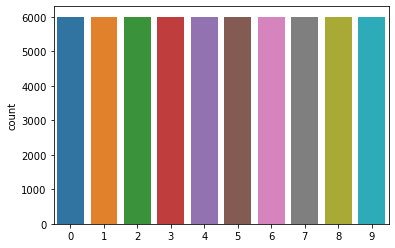

In [23]:
sns.countplot(y_train)

In [24]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
num_class = 10

In [25]:
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [26]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [27]:
X_train.shape

(60000, 28, 28, 1)

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

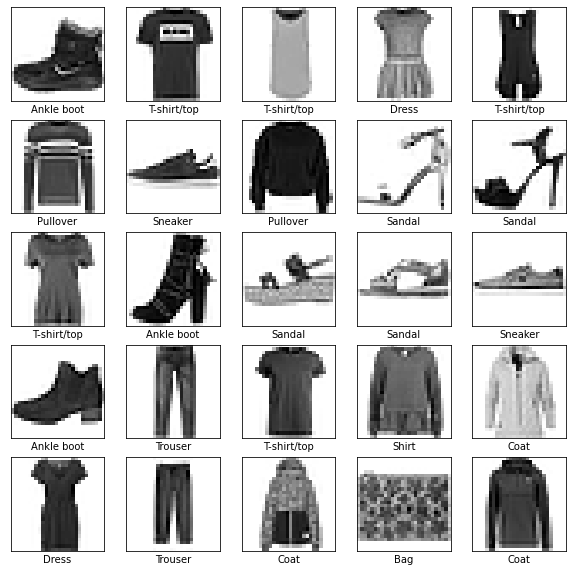

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [62]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(126,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [63]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)            

In [42]:
model.compile(optimizer='adam',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])

In [43]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 30s 17ms/step - loss: 0.5112 - accuracy: 0.8151 - val_loss: 0.3462 - val_accuracy: 0.8732
Epoch 2/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.3601 - accuracy: 0.8689 - val_loss: 0.2934 - val_accuracy: 0.8913
Epoch 3/10
1688/1688 [==============================] - 31s 19ms/step - loss: 0.3139 - accuracy: 0.8853 - val_loss: 0.2768 - val_accuracy: 0.8937
Epoch 4/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2860 - accuracy: 0.8952 - val_loss: 0.2670 - val_accuracy: 0.9028
Epoch 5/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2682 - accuracy: 0.9004 - val_loss: 0.2393 - val_accuracy: 0.9128
Epoch 6/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2505 - accuracy: 0.9044 - val_loss: 0.2392 - val_accuracy: 0.9123
Epoch 7/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2388 - accuracy: 0.9097 - val_loss: 0.2305 -

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', 
                                patience=10,
                                cooldown=1,
                                verbose=1),
              EarlyStopping(monitor='val_loss',
                            min_delta=1e-4,
                            patience=15)]

In [48]:
model.compile(optimizer='sgd',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])

In [49]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 32s 19ms/step - loss: 1.0336 - accuracy: 0.6220 - val_loss: 0.6033 - val_accuracy: 0.7627
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.6156 - accuracy: 0.7710 - val_loss: 0.5150 - val_accuracy: 0.8108
Epoch 3/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.5427 - accuracy: 0.8007 - val_loss: 0.4648 - val_accuracy: 0.8292
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.5050 - accuracy: 0.8151 - val_loss: 0.4393 - val_accuracy: 0.8435
Epoch 5/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.4771 - accuracy: 0.8262 - val_loss: 0.4157 - val_accuracy: 0.8472
Epoch 6/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.4554 - accuracy: 0.8353 - val_loss: 0.4236 - val_accuracy: 0.8465
Epoch 7/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.4339 - accuracy: 0.8425 - val_loss: 0.3950 -

In [51]:
model.compile(optimizer='rmsprop',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.4987 - accuracy: 0.8193 - val_loss: 0.4077 - val_accuracy: 0.8435
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.3581 - accuracy: 0.8700 - val_loss: 0.3228 - val_accuracy: 0.8860
Epoch 3/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.3242 - accuracy: 0.8828 - val_loss: 0.2996 - val_accuracy: 0.8905
Epoch 4/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.3150 - accuracy: 0.8870 - val_loss: 0.2975 - val_accuracy: 0.8945
Epoch 5/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.3078 - accuracy: 0.8889 - val_loss: 0.3098 - val_accuracy: 0.8905
Epoch 6/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3067 - accuracy: 0.8912 - val_loss: 0.2808 - val_accuracy: 0.8988
Epoch 7/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.3049 - accuracy: 0.8920 - val_loss: 0.2811 -

In [53]:
model.compile(optimizer='nadam',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 34s 19ms/step - loss: 0.5112 - accuracy: 0.8139 - val_loss: 0.3697 - val_accuracy: 0.8667
Epoch 2/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3587 - accuracy: 0.8680 - val_loss: 0.3038 - val_accuracy: 0.8915
Epoch 3/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.3147 - accuracy: 0.8828 - val_loss: 0.2811 - val_accuracy: 0.8995
Epoch 4/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2884 - accuracy: 0.8923 - val_loss: 0.2686 - val_accuracy: 0.8992
Epoch 5/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.2667 - accuracy: 0.8996 - val_loss: 0.2514 - val_accuracy: 0.9072
Epoch 6/10
1688/1688 [==============================] - 38s 23ms/step - loss: 0.2535 - accuracy: 0.9058 - val_loss: 0.2452 - val_accuracy: 0.9075
Epoch 7/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2374 - accuracy: 0.9105 - val_loss: 0.2258 -

In [57]:
model.compile(optimizer='Adadelta',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 31s 18ms/step - loss: 2.2904 - accuracy: 0.1478 - val_loss: 2.2562 - val_accuracy: 0.3617
Epoch 2/10
1688/1688 [==============================] - 32s 19ms/step - loss: 2.2449 - accuracy: 0.2459 - val_loss: 2.2025 - val_accuracy: 0.4043
Epoch 3/10
1688/1688 [==============================] - 32s 19ms/step - loss: 2.1921 - accuracy: 0.3198 - val_loss: 2.1327 - val_accuracy: 0.4033
Epoch 4/10
1688/1688 [==============================] - 32s 19ms/step - loss: 2.1254 - accuracy: 0.3659 - val_loss: 2.0438 - val_accuracy: 0.4167
Epoch 5/10
1688/1688 [==============================] - 31s 18ms/step - loss: 2.0350 - accuracy: 0.4006 - val_loss: 1.9307 - val_accuracy: 0.4588
Epoch 6/10
1688/1688 [==============================] - 31s 18ms/step - loss: 1.9230 - accuracy: 0.4283 - val_loss: 1.7966 - val_accuracy: 0.5235
Epoch 7/10
1688/1688 [==============================] - 31s 18ms/step - loss: 1.7960 - accuracy: 0.4545 - val_loss: 1.6496 -

In [61]:
model.compile(optimizer='adagrad',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 30s 18ms/step - loss: 1.8433 - accuracy: 0.3838 - val_loss: 1.0550 - val_accuracy: 0.6607
Epoch 2/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.9966 - accuracy: 0.6399 - val_loss: 0.7606 - val_accuracy: 0.7438
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.8164 - accuracy: 0.7063 - val_loss: 0.6746 - val_accuracy: 0.7523
Epoch 4/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.7384 - accuracy: 0.7307 - val_loss: 0.6334 - val_accuracy: 0.7593
Epoch 5/10
1688/1688 [==============================] - 30s 17ms/step - loss: 0.6951 - accuracy: 0.7440 - val_loss: 0.6036 - val_accuracy: 0.7757
Epoch 6/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.6673 - accuracy: 0.7546 - val_loss: 0.5809 - val_accuracy: 0.7785
Epoch 7/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.6419 - accuracy: 0.7612 - val_loss: 0.5642 -

In [64]:
model.compile(optimizer='adamax',loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.6164 - accuracy: 0.7746 - val_loss: 0.4384 - val_accuracy: 0.8405
Epoch 2/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.4405 - accuracy: 0.8401 - val_loss: 0.3767 - val_accuracy: 0.8628
Epoch 3/10
1688/1688 [==============================] - 31s 19ms/step - loss: 0.3912 - accuracy: 0.8605 - val_loss: 0.3507 - val_accuracy: 0.8718
Epoch 4/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3626 - accuracy: 0.8690 - val_loss: 0.3213 - val_accuracy: 0.8807
Epoch 5/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.3409 - accuracy: 0.8767 - val_loss: 0.3101 - val_accuracy: 0.8878
Epoch 6/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.3217 - accuracy: 0.8824 - val_loss: 0.2914 - val_accuracy: 0.8930
Epoch 7/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.3045 - accuracy: 0.8893 - val_loss: 0.2976 -

In [59]:
model = Sequential()
model.add(Conv2D(filters=5,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(24, 24, 3)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 22, 22, 5)         140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
